In [2]:
import glob
import scipy.fftpack
path = (glob.glob("datasets/ddp/*.wav"))

In [31]:
def sound(loc):
    from scipy.io import wavfile as wav
    import glob
    import numpy as np
    rate, data = wav.read(loc)
    import matplotlib.pyplot as plt
    # beat detection
    threshold = 3000
    beat = []
    i = 0
    while i < len(data):
        if abs(data[i]) >= threshold:
            beat.append(i)
            i = i+10000
        i+=1
    total_beats = len(beat)
    print(loc)
    
    def maximum(array = None):
        length = p+q
        freq = (rate/2)*(np.linspace(0,1,int(length/2)))
        fft_sig = abs(np.fft.fft(array))
        dim = int(length/2)
        #plt.plot(freq, fft_sig[0:dim])
        idx = np.argmax(fft_sig[25:dim])
        #print(idx)
        return [idx,max(fft_sig)]
    
    #window
    p = 1000
    q = 6000
    beats = []
    for i in range(total_beats):
        beats.append(data[(beat[i]-p):(beat[i]+q)])
    
    result = []
    final_result = []
    for array in beats:
        if len(array) == p+q:
            result.append(maximum(array))
            
    final_result = np.array(result)
    if len(final_result)> 10:
        from sklearn.cluster import DBSCAN
        from sklearn import preprocessing
        scaler = preprocessing.StandardScaler().fit(final_result)
        final_result2 = scaler.transform(final_result)
        clf = DBSCAN( eps = 0.5, min_samples= 5 )
        clf.fit(final_result2)
        labels = clf.labels_ 
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        print(n_clusters_)
        plt.scatter(final_result2[:,0], final_result2[:,1],c=labels.astype(np.float))
        plt.xlim(-10,5)
        plt.show() 

datasets/ddp\f10.wav
1


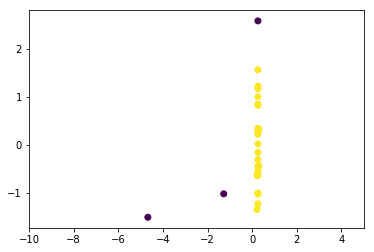

datasets/ddp\f25.wav
1


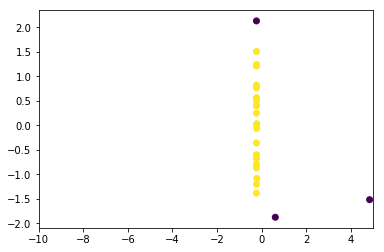

datasets/ddp\f25b.wav
1


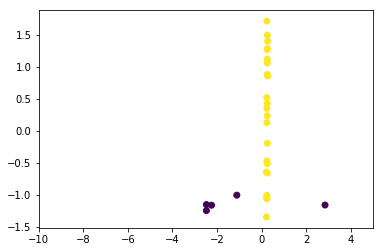

datasets/ddp\f2b.wav
datasets/ddp\f2b2.wav
datasets/ddp\f2b3.wav
datasets/ddp\f2g1.wav
datasets/ddp\f2g2.wav
datasets/ddp\f50.wav
1


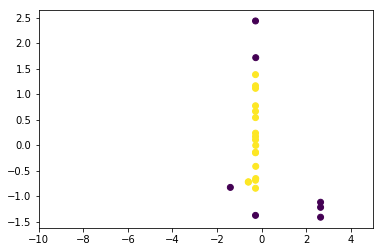

datasets/ddp\f50b.wav
2


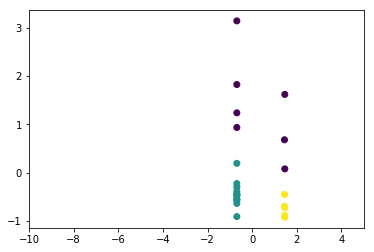

datasets/ddp\f75.wav
1


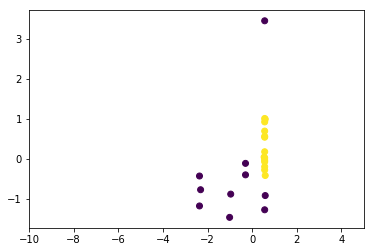

datasets/ddp\f75b.wav
2


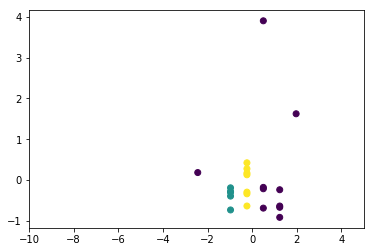

datasets/ddp\p10.wav
1


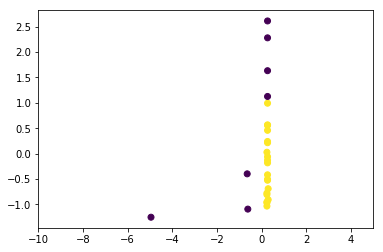

datasets/ddp\p2.wav
datasets/ddp\p25.wav
1


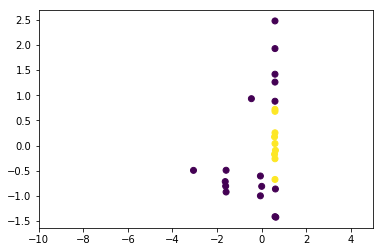

datasets/ddp\p50.wav
1


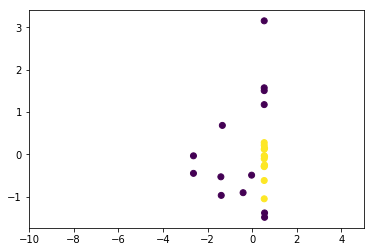

datasets/ddp\r.wav
datasets/ddp\r2.wav
datasets/ddp\r25.wav
2


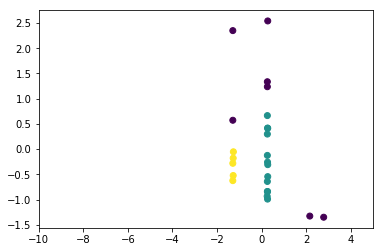

datasets/ddp\r3.wav
datasets/ddp\r4.wav
datasets/ddp\r5.wav
1


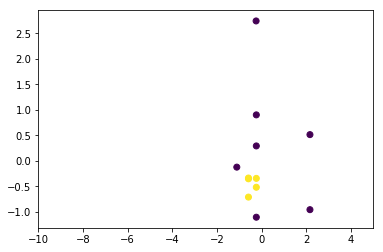

datasets/ddp\r50.wav
1


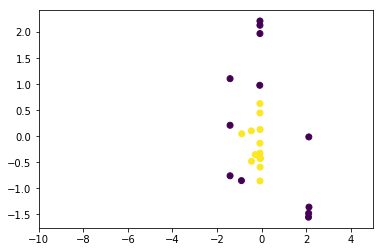

datasets/ddp\r6.wav
datasets/ddp\r75.wav
2


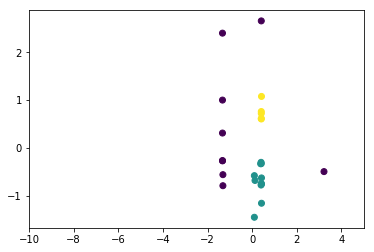

datasets/ddp\ravi.wav
1


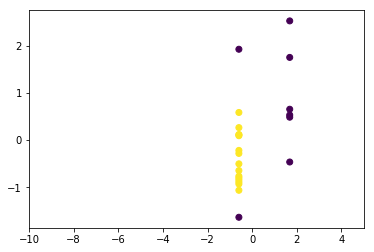

datasets/ddp\ravi2.wav
1


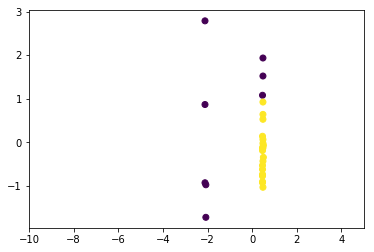

datasets/ddp\ravi3.wav
1


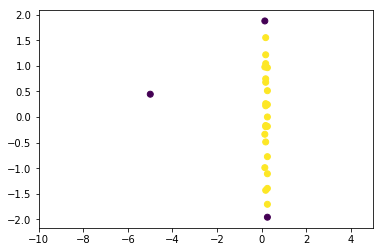

datasets/ddp\ravi4.wav
1


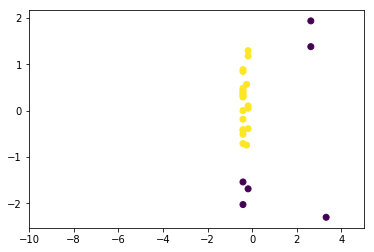

datasets/ddp\ravi5.wav
1


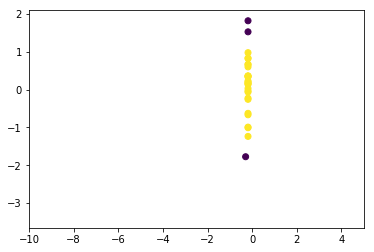

datasets/ddp\ravi6.wav
2


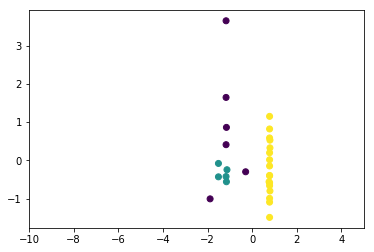

In [32]:
for directory in path:
    sound(directory)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter?